<a href="https://colab.research.google.com/github/Abigail1410/Trabajo-final/blob/master/Copy_of_Feliz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as g #módulo para gráficos
import numpy as n #para matemática
import pandas as p #para manejar datos
from sklearn.decomposition import PCA #para aplicar componentes principales
import seaborn as s #gráficos
from sklearn.preprocessing import StandardScaler as SS #para estandarizar datos

In [0]:
feliz=p.read_csv('https://raw.githubusercontent.com/AlcidesOxa/AlOXa/master/world-happiness-report-2019.csv')
feliz.set_index('Country (region)',inplace=True) #establece a los nombres de países como identificadores de observaciones
feliz.columns

Index(['Ladder', 'SD of Ladder', 'Positive affect', 'Negative affect',
       'Social support', 'Freedom', 'Corruption', 'Generosity',
       'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype='object')

In [0]:
# % de datos completoas por variable
print(feliz.count().sort_values()/feliz.shape[0])
# % de observaciones completos en todo el dataset
print("% de datos completos en todo el dataset: ",1-feliz.loc[feliz.isnull().sum(axis=1)>0].shape[0]/feliz.shape[0])
feliz2=feliz.iloc[:,2:11].dropna() #se eliminan datos perdidos

Corruption                  0.948718
Healthy life\nexpectancy    0.961538
Log of GDP\nper capita      0.974359
Positive affect             0.993590
Negative affect             0.993590
Social support              0.993590
Freedom                     0.993590
Generosity                  0.993590
Ladder                      1.000000
SD of Ladder                1.000000
dtype: float64
% de datos completos en todo el dataset:  0.8974358974358975


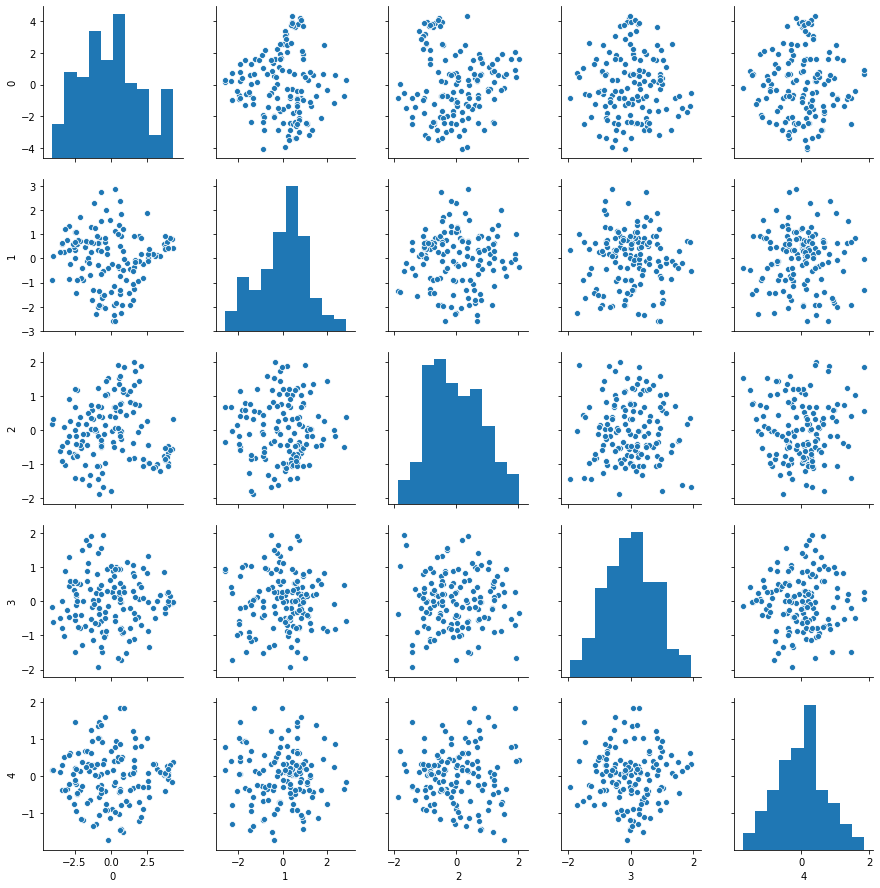

In [0]:
comps=p.DataFrame(PCA(n_components=0.9).fit_transform(SS().fit_transform(feliz2)))
#Gráfico de componentes principales para detectar valores atípicos
s.pairplot(comps) #no existen datos atípicos

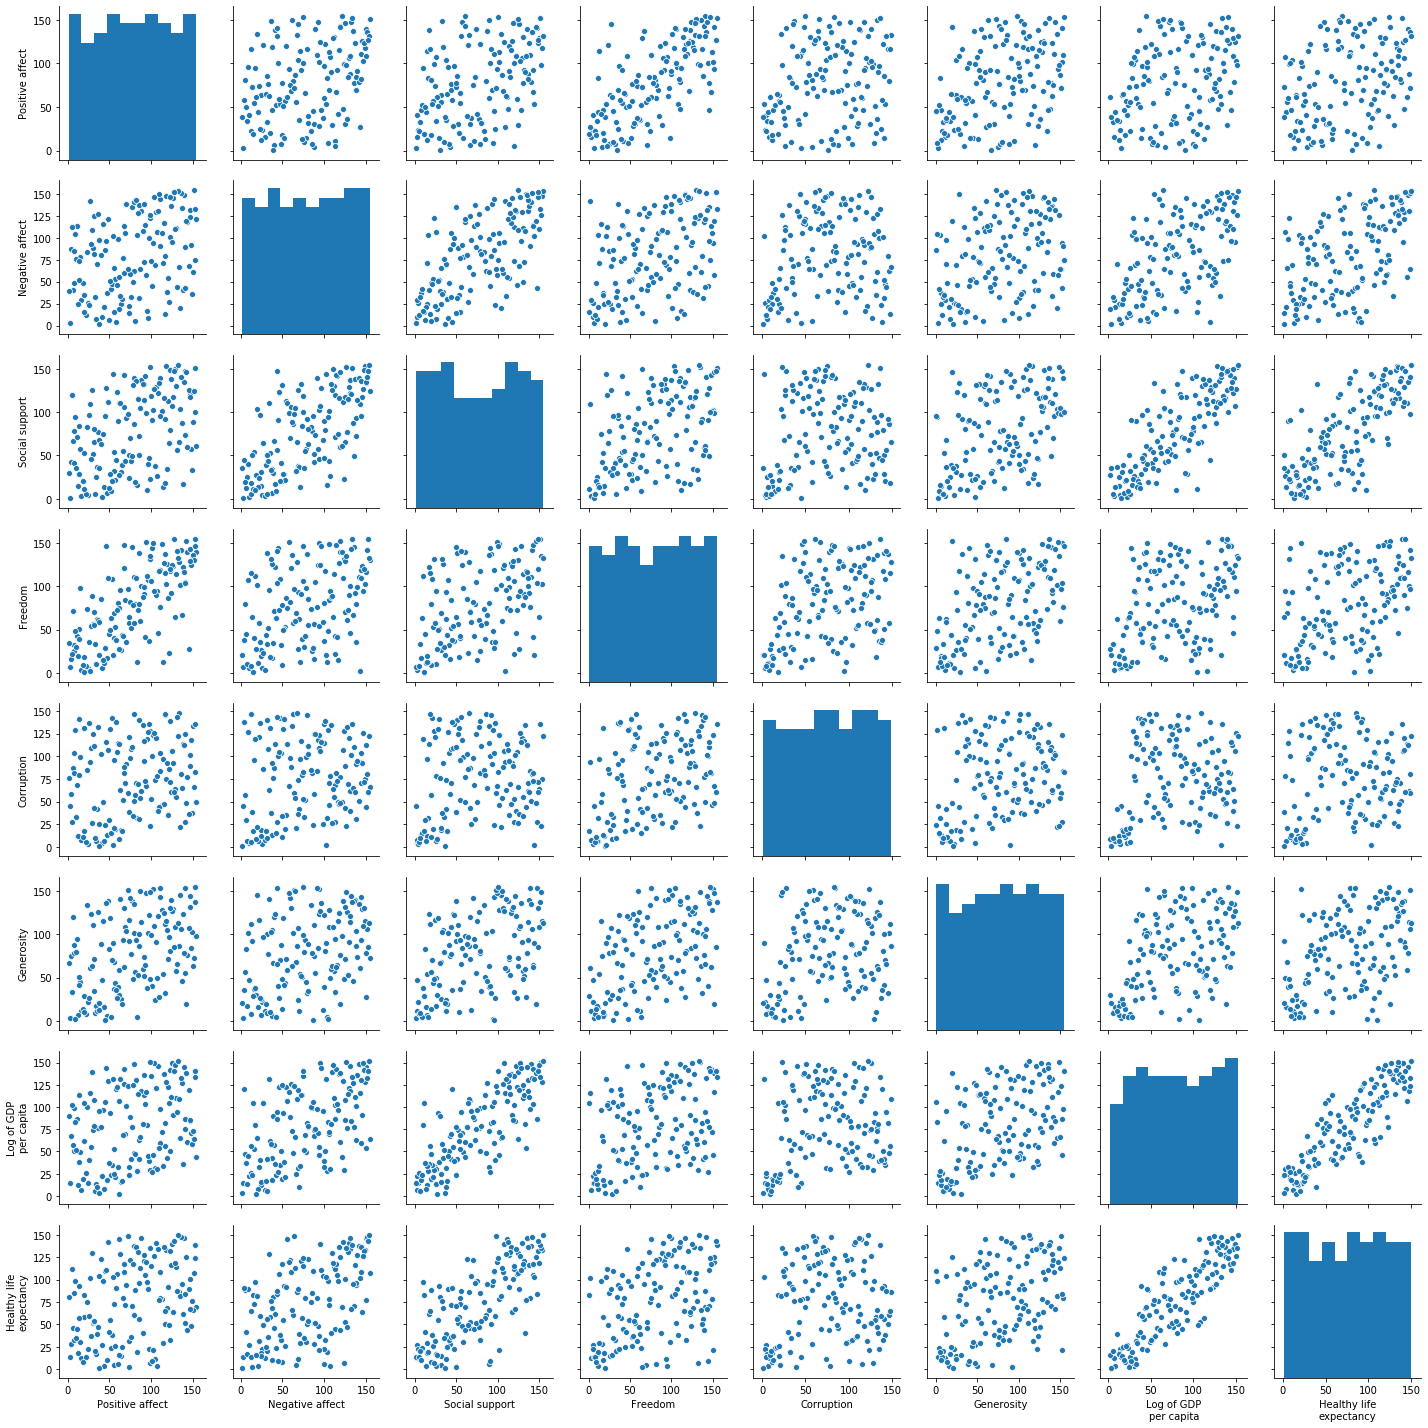

In [0]:
s.pairplot(feliz2) #nube de puntos de todos los pares de variables

In [0]:
round(feliz2.describe(),2) #estadísticos descriptivos

,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,140.00,140.00,140.00,140.00,140.00,140.00,140.00,140.00
mean,78.24,79.16,77.50,78.83,75.70,78.85,79.01,75.48
std,44.33,44.51,45.82,45.11,42.66,44.73,43.36,43.98
min,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00
25%,40.75,40.75,36.75,39.75,39.75,40.75,41.75,36.75
50%,78.50,78.50,77.50,79.50,76.50,79.50,78.50,77.50
75%,116.25,117.25,118.25,118.25,112.25,116.25,117.25,113.25
max,154.00,154.00,155.00,155.00,148.00,155.00,152.00,150.00


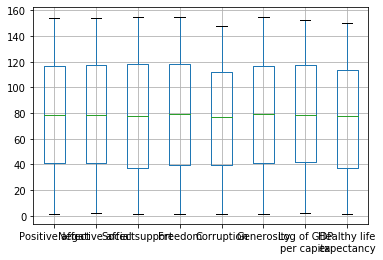

In [0]:
feliz2.boxplot() #diagrama de cajas

In [0]:
import scipy.cluster.hierarchy as h #módulo para aplicar un cluster jerárquico
from sklearn.cluster import AgglomerativeClustering as AC #módulo para aplicar otro cluster jerárquico
from sklearn.cluster import KMeans as KM #módulo para aplicar el algoritmo k-medias

Text(0, 0.5, 'Distancias euclídeas')

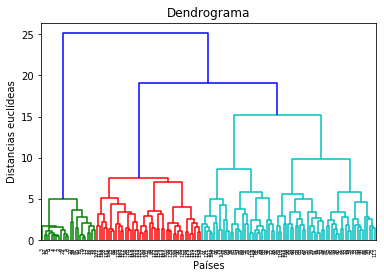

In [0]:
Z=SS().fit_transform(feliz2) #estandarizar los datos
#grafica un dendrograma con el método de ward
CJ=h.linkage(Z,method='ward')
dendro=h.dendrogram(CJ) #dibuja el dendrograma
g.title('Dendrograma') #título del gráfico
g.xlabel('Países') #etiqueta del eje X
g.ylabel('Distancias euclídeas') #etiqueta del eje Y

In [0]:
#crea una instancia de un análisis cluster jerárquico por el método de ward
clu1=AC(n_clusters=4,affinity='euclidean',linkage='ward')
#conglomera a los países en función a sus datos
gr=clu1.fit_predict(Z)

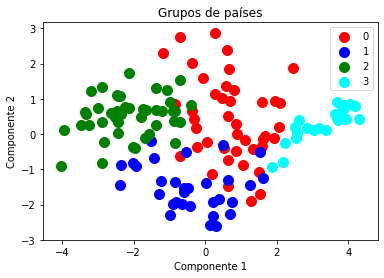

In [0]:
#aplica un análisis de componentes principales y retiene los 2 primeros
Y=PCA(n_components=2).fit_transform(Z)
co=['red','blue','green','cyan'] #lista de colores
li=list(range(0,4)) #lista de números del 0 al 3
for c,i in zip(co,li): #grafica nubes de puntos para cada grupo diferenciando por colores
  g.scatter(Y[gr==i,0],Y[gr==i,1], s=100, c=c, label=i)
g.title('Grupos de países')
g.xlabel('Componente 1')
g.ylabel('Componente 2')
g.legend() #leyenda

In [0]:
#convierte en dataframe a la variable gr, establece como identificador al mismo que del de feliz2
#y concatena los dataframe feliz2 y gr
feliz3=p.concat((feliz2,p.DataFrame(gr,columns=['GrupoW'],index=feliz2.index)),axis=1)
for i in n.arange(4):
  print(feliz3.loc[feliz3['GrupoW']==i].index) #muestra los nombres de los países del grupo i

Index(['Costa Rica', 'Czech Republic', 'Mexico', 'Chile', 'Guatemala',
       'Panama', 'Brazil', 'Uruguay', 'El Salvador', 'Slovakia',
       'Trinidad and Tobago', 'Poland', 'Uzbekistan', 'Colombia', 'Nicaragua',
       'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Thailand', 'Jamaica',
       'Mauritius', 'Honduras', 'Bolivia', 'Paraguay', 'Peru', 'Portugal',
       'Philippines', 'Libya', 'Dominican Republic', 'Malaysia', 'Kyrgyzstan',
       'Indonesia', 'Bhutan', 'Laos', 'South Africa', 'Albania', 'Cambodia',
       'Gambia', 'Sri Lanka', 'Myanmar', 'Rwanda'],
      dtype='object', name='Country (region)')
Index(['Israel', 'Spain', 'Italy', 'Lithuania', 'Latvia', 'South Korea',
       'Kazakhstan', 'Hungary', 'Russia', 'Serbia', 'Moldova', 'Montenegro',
       'Croatia', 'Bosnia and Herzegovina ', 'Turkey', 'Belarus', 'Greece',
       'Mongolia', 'Macedonia', 'Algeria', 'Azerbaijan', 'Lebanon', 'Vietnam',
       'Bulgaria', 'Gabon', 'Venezuela', 'Armenia', 'Georgia', 'Tunisia',
 

In [0]:
#caracteriza los grupos del método jerárquico
feliz3.groupby('GrupoW').mean()

,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
GrupoW,,,,,,,,
0,38.214286,78.809524,67.380952,49.547619,88.214286,72.523810,76.785714,67.285714
1,120.870968,73.419355,66.161290,120.935484,99.709677,93.741935,63.064516,60.967742
2,103.613636,107.818182,125.977273,104.068182,75.818182,101.590909,124.590909,123.704545
3,45.347826,32.695652,18.521739,27.260870,20.260870,26.826087,17.391304,17.739130


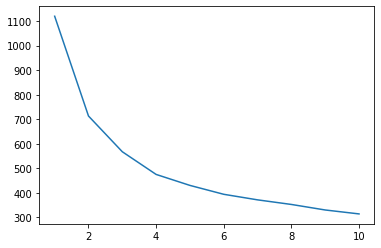

In [0]:
scw=[] #lista vacía
for i in range(1,11):
  km=KM(n_clusters=i,init='k-means++') #establece el algoritmo k-medias con i grupos
  km.fit(Z) #aplica el k-medias
  scw.append(km.inertia_) #guarda en scw la suma de cuadrados dentro de grupos
g.plot(range(1,11),scw) #grafica la suma de cuadrados dentro de grupos

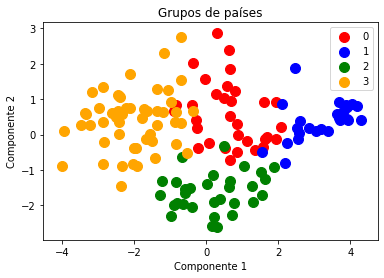

In [0]:
#crea la instancia k-medias con KM y clasifica con fit_predict
grupo=KM(n_clusters=4,init='k-means++').fit_predict(Z)
co=['red','blue','green','orange']
li=list(range(0,4))
for c,i in zip(co,li):
  g.scatter(Y[grupo==i,0],Y[grupo==i,1], s=100, c=c, label=i)
g.title('Grupos de países')
g.xlabel('Componente 1')
g.ylabel('Componente 2')
g.legend()

In [0]:
#convierte la variable grupo a dataframe
#concatena (une) el dataframe feliz3 con el de grupo (1 es por columnas)
feliz3=p.concat([feliz3,p.DataFrame(grupo,columns=['GrupoKM'],index=feliz2.index)],axis=1)
for i in n.arange(4):
  print(feliz3.loc[feliz3['GrupoKM']==i].index) #muestra los nombres de los países del grupo i

Index(['Costa Rica', 'Mexico', 'Chile', 'Guatemala', 'Panama', 'Brazil',
       'El Salvador', 'Trinidad and Tobago', 'Colombia', 'Nicaragua',
       'Argentina', 'Ecuador', 'Thailand', 'Jamaica', 'Mauritius', 'Honduras',
       'Bolivia', 'Paraguay', 'Peru', 'Philippines', 'Dominican Republic',
       'Malaysia', 'Nigeria', 'Kyrgyzstan', 'Indonesia', 'Bhutan', 'Laos',
       'South Africa', 'Cambodia', 'Kenya', 'Sri Lanka', 'Myanmar'],
      dtype='object', name='Country (region)')
Index(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland',
       'Sweden', 'New Zealand', 'Canada', 'Austria', 'Australia', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Malta', 'France', 'Uruguay', 'Singapore', 'Uzbekistan', 'Estonia',
       'Japan', 'Kazakhstan'],
      dtype='object', name='Country (region)')
Index(['Israel', 'Czech Republic', 'Spain', 'Italy', 'Slovakia', 'Poland',
       'Lithuania', 'Slovenia', 'Romania', 'Cypru

In [0]:
#caracteriza los grupos del método no jerárquico
feliz3.groupby('GrupoKM').mean()

,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,GrupoW
GrupoKM,,,,,,,,,
0,31.187500,78.156250,69.718750,47.750000,91.031250,68.562500,82.968750,74.875000,0.12500
1,41.560000,31.080000,19.080000,29.000000,19.080000,29.160000,22.760000,23.400000,2.68000
2,109.419355,67.709677,54.451613,106.258065,114.516129,81.129032,55.096774,47.774194,0.83871
3,106.250000,109.711538,124.115385,105.557692,70.346154,107.711538,117.884615,117.403846,1.75000


In [0]:
#importa el módulo para aplicar un análisis discriminante lineal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
#importa el módulo para aplicar una regresión logística
from sklearn.linear_model import LogisticRegression as lr
#importa el módulo para dividir un conjunto de datos
from sklearn.model_selection import train_test_split as tt
#importa el módulo para aplicar Support Vector Machine
from sklearn.svm import SVC
#importa el módulo para realizar reportes de clasificación y matrices de confusión
from sklearn.metrics import classification_report as cl, confusion_matrix as mc

In [0]:
# crea instancias de la función lda (análisis discriminante)
adkm=lda()
adw=lda()
# se aplica el análisis discriminante a los datos de feliz2
adkm.fit(feliz2,feliz3['GrupoKM'])
adw.fit(feliz2,feliz3['GrupoW'])
# % de varianza explicada por cada dimensión
print("% explicado del KM",adkm.explained_variance_ratio_,"\n% explicado del Ward",adw.explained_variance_ratio_)

% explicado del KM [0.67669273 0.21200307 0.11130421] 
% explicado del Ward [0.68418855 0.25160542 0.06420603]


In [0]:
# dividiendo los datos en datos de entrenamiento y de prueba
Xentr, Xpr, yentr, ypr= tt(feliz2, feliz3['GrupoW'], test_size = 0.10)

In [0]:
# se aplica el análisis discriminante a los datos de entrenamiento
clas1=lda().fit(Xentr,yentr)
# predice el grupo al que pertenece cada país con los datos de prueba
clasAD=clas1.predict(Xpr)
print(mc(ypr,clasAD))

[[3 0 1 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 2]]


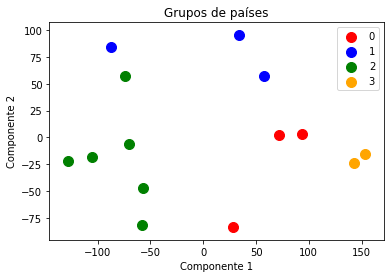

In [0]:
co=['red','blue','green','orange']
li=list(range(0,4))
W=PCA(n_components=2).fit_transform(Xpr)
for c,i in zip(co,li):
  g.scatter(W[clasAD==i,0],W[clasAD==i,1], s=100, c=c, label=i)
g.title('Grupos de países')
g.xlabel('Componente 1')
g.ylabel('Componente 2')
g.legend()

In [0]:
# se aplica el análisis discriminante logístico a los datos de entrenamiento
clas2=lr().fit(Xentr,yentr)
# predice el grupo al que pertenece cada país con los datos de prueba
clasLR=clas2.predict(Xpr)
print(mc(ypr,clasLR))

[[2 0 2 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 2]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


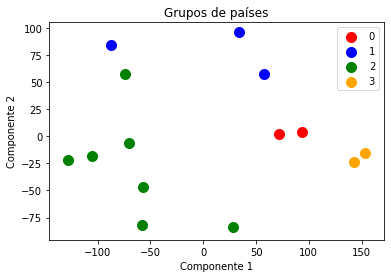

In [0]:
co=['red','blue','green','orange']
li=list(range(0,4))
W=PCA(n_components=2).fit_transform(Xpr)
for c,i in zip(co,li):
  g.scatter(W[clasLR==i,0],W[clasLR==i,1], s=100, c=c, label=i)
g.title('Grupos de países')
g.xlabel('Componente 1')
g.ylabel('Componente 2')
g.legend()

In [0]:
# se aplica el support vector machine a los datos de entrenamiento
clas3=SVC(kernel='linear').fit(Xentr,yentr)
# predice el grupo al que pertenece cada país con los datos de prueba
clasSVM=clas3.predict(Xpr)
print(mc(ypr,clasSVM))

[[4 0 0 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 2]]


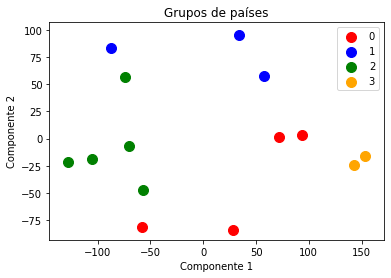

In [0]:
co=['red','blue','green','orange']
li=list(range(0,4))
W=PCA(n_components=2).fit_transform(Xpr)
for c,i in zip(co,li):
  g.scatter(W[clasSVM==i,0],W[clasSVM==i,1], s=100, c=c, label=i)
g.title('Grupos de países')
g.xlabel('Componente 1')
g.ylabel('Componente 2')
g.legend()